# Plotting Tools

In [3]:
import os
import csv
import glob

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

In [4]:
def plot_one_run(log_dir):
    all_returns = []
    for log_file in sorted(glob.glob(log_dir + "logs.mat")):
        data = loadmat(log_file)
        all_returns.append(data["returns"][0])

    max_trial_length = min(map(len, all_returns))
    trimmed_returns = np.array([r[:max_trial_length] for r in all_returns])
    average_returns = np.mean(trimmed_returns, axis=0)
    # Plot result
    plt.figure()
    plt.plot(np.arange(len(average_returns)), average_returns)
    plt.title("Returns vs Iteration (averaged across seeds)")
    plt.xlabel("Iteration number")
    plt.ylabel("Return")
    plt.show()

# Cartpole

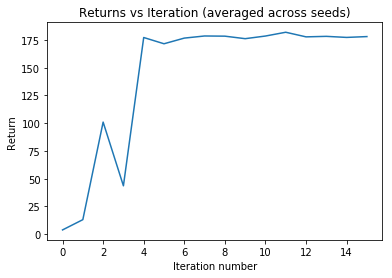

In [6]:
plot_one_run('/home/vitchyr/git/handful-of-trials/log/test/2019-07-01--16:18:38/')https://www.youtube.com/watch?v=uj6Z7ZYuSzs&list=PLsbYZauRyT1KZvMjDMNm-3NheCXzwLZub&index=14

# Pointmass

## Pointmass Fixed Goal

With squared exponential loss, it solves it perfectly

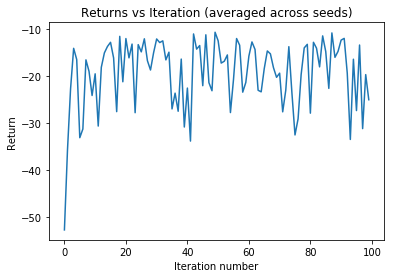

In [16]:
plot_one_run('/home/vitchyr/git/handful-of-trials/log/pointmass-reach-fixed-point-cartpole-settings/2019-07-01--17:22:52/')

With squared loss:

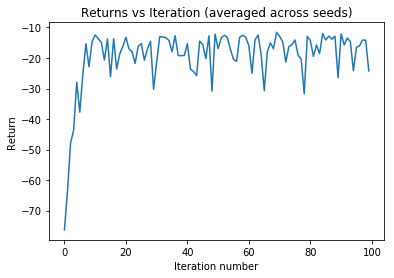

In [17]:
plot_one_run('/home/vitchyr/git/handful-of-trials/log/pointmass-reach-fixed-point-cartpole-settings-squared-loss/2019-07-01--17:28:09/')

## Pointmass: No Walls (Varied goals)

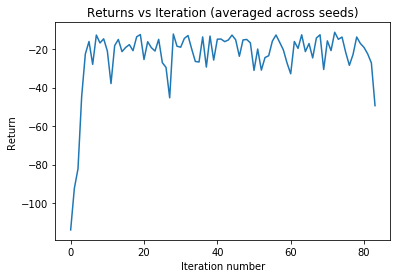

In [18]:
plot_one_run('/home/vitchyr/git/handful-of-trials/log/pointmass-no-walls-cartpole-settings-squared-loss/2019-07-01--21:03:37/')

## Pointmass U Wall

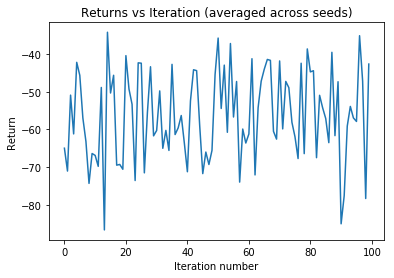

In [20]:
plot_one_run('/home/vitchyr/git/handful-of-trials/log/pointmass-u-wall-solve-in-8-ph10-run2/2019-07-01--22:41:41/')
